# Inspect results of GLM-HMM model fit with side prior

This notebook examines the results of `scripts/fit_glm_hmm.py` run on the processed data in `data/processed/ashwood_all`, using the side prior from the IBL model as a covariate. The goal of this analysis is to see if the side prior can be used to predict mouse behavior, and how it changes the states found by the GLM-HMM.

In [1]:
import json
import pprint

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit, expit

## Load results

In [7]:
result_fpaths = [f'../results/glm_hmm_prior_all/results_{i}.json' for i in range(1, 5)]

results = []
for fpath in result_fpaths:
    with open(fpath, 'r') as f:
        results.append(json.load(f))

## Print parameters

### 1-state model

In [8]:
pprint.pprint(results[0]['params'], indent=4)

{   'state 0': {   'bias': -0.06016542233496605,
                   'coef': 2.454026402492831,
                   'prior': -0.4868281795440341}}


### 2-state model

In [9]:
pprint.pprint(results[1]['params'], indent=4)

{   'state 0': {   'bias': 1.4459030115997484,
                   'coef': 2.2523322736951714,
                   'prior': 0.353910724547018},
    'state 1': {   'bias': -1.529147213284299,
                   'coef': 2.1954102142320995,
                   'prior': 0.7788720775713411}}


### 3-state model

In [10]:
pprint.pprint(results[2]['params'], indent=4)

{   'state 0': {   'bias': -3.0488021881104417,
                   'coef': 1.4690330892273784,
                   'prior': 0.37027707354498196},
    'state 1': {   'bias': 2.6707605019568113,
                   'coef': 1.4786097747961764,
                   'prior': -2.381297172087565},
    'state 2': {   'bias': -0.20423027983431766,
                   'coef': 8.754230733149877,
                   'prior': -1.2589882797706855}}


### 4-state model

In [11]:
pprint.pprint(results[3]['params'], indent=4)

{   'state 0': {   'bias': -1.2661849754191659,
                   'coef': 7.854244701029181,
                   'prior': 0.1299268026747347},
    'state 1': {   'bias': 1.0958858569612204,
                   'coef': 8.992729784097518,
                   'prior': 0.4091900489585478},
    'state 2': {   'bias': -3.346312824360152,
                   'coef': 1.2077958052382356,
                   'prior': 0.6452748415056031},
    'state 3': {   'bias': 2.7993777643769424,
                   'coef': 1.198499244696349,
                   'prior': -0.07352142208407876}}


## Plot log-likelihood as function of number of states

array([-383729.13511161, -315451.57465238, -266742.47685405,
       -259644.65811175])

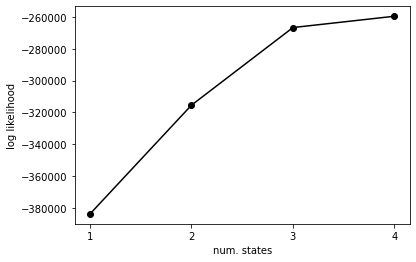

In [13]:
nstate_vals = np.array([r['n_states'] for r in results])
loglik_vals = np.array([r['fit_loglik'][-1] for r in results])

plt.plot(nstate_vals, loglik_vals, 'ko-')
plt.xticks(nstate_vals)
plt.xlabel('num. states')
plt.ylabel('log likelihood');

As they found in Ashwood et al., 2022, the increase in the log-likelihood value drops off after 3 states. This means that the 3-state model is probably the best fit. (At some point in the future, we could use a metric like AIC (Akaike Information Criterion) to make sure that this is in fact the case.) 

## Plot psychometric curves of all states

In [ ]:
def compute_psych_curve(x_vals, bias, coef):
    return expit(bias + coef * x_vals)

def plot_psych_curves(params, x_min, x_max):

    x_vals = np.linspace(x_min, x_max, 1000)

    for k, v in params.items():
        y_vals = compute_psych_curve(x_vals, v['bias'], v['coef'])
        plt.plot(x_vals, y_vals, label=k)
        plt.xlabel('constrast (scaled)')
        plt.ylabel('p(left)')

    plt.legend()


### 1-state model

In [ ]:
res = results[0]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)

### 2-state model

In [ ]:
res = results[1]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)

### 3-state model

In [ ]:
res = results[2]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)